In [1]:
import warnings
warnings.filterwarnings('ignore')
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

albums = ["Prism", "Smile", "Teenage Dream", "Witness"]

In [2]:
data = {}
for i,c in enumerate(albums):
    f = open("./Katy_Perry/" + c + ".txt", "r") 
    data[c] = f.read()  

In [3]:
data.keys()

dict_keys(['Prism', 'Smile', 'Teenage Dream', 'Witness'])

In [4]:
data["Smile"]

'"Never Really Over"\n\nI\'m losing my self control\nYeah, you\'re starting to trickle back in\nBut I don\'t wanna fall down the rabbit hole\nCross my heart, I won\'t do it again\n\nI tell myself, tell myself, tell myself, draw the line\nAnd I do I do\nBut once in a while I trip up and I cross the line\nAnd I think of you\n\nTwo years and just like that\nMy head still takes me back\nThought it was done, but I\nGuess it\'s never really over\nOh, we were such a mess\nBut wasn\'t it the best?\nThought it was done, but I\nGuess it\'s never really over\n\nJust because it\'s over doesn\'t mean it\'s really over\nAnd if I think it over, maybe you\'ll be coming over again\nAnd I\'ll have to get over you all over again\nJust because it\'s over doesn\'t mean it\'s really over\nAnd if I think it over, maybe you\'ll be coming over again\nAnd I\'ll have to get over you all over again\n\nI guess I could try hypnotherapy\nI gotta rewire this brain\n\'Cause I can\'t even go on the internet\nWithout ev

In [5]:
pd.set_option('max_colwidth', 200)
df1 = pd.DataFrame.from_dict(data, orient ='index')
df1 = df1.reset_index()
df1.columns = ['Album', 'Lyrics']
df1

,Album,Lyrics
0,Prism,"""Roar""\n\nI used to bite my tongue and hold my breath\nScared to rock the boat and make a mess\nSo I sit quietly\nAgree politely\n\nI guess that I forgot I had a choice\nI let you push me past the..."
1,Smile,"""Never Really Over""\n\nI'm losing my self control\nYeah, you're starting to trickle back in\nBut I don't wanna fall down the rabbit hole\nCross my heart, I won't do it again\n\nI tell myself, tell..."
2,Teenage Dream,"""Teenage Dream""\n\nYou think I'm pretty\nWithout any make-up on\nYou think I'm funny\nWhen I tell the punchline wrong\nI know you get me\nSo I let my walls come down, down\n\nBefore you met me\nI ..."
3,Witness,"""Witness""\n\nIf I lost it all today, would you stay?\nCould my love be enough to stimulate?\nIf shit hit the fan, grenades got thrown\nWould you still show, oh?\nCould you go down with me to the m..."


In [6]:
import re
import string

def round1(text):
    #lower the Text
    text = text.lower()
    # Remove Numbers 
    text = re.sub(r"\d+", "", text)
    # Remove Symbols and special characters
    # Below return true if not alphanumereic 
    text = re.sub(r'[^\w]', ' ', text)
    # Remove more than a single whitespace 
    text = ' '.join(text.split())
    # Remove Leading and Trailing Whitespaces
    text = text.strip()
    return text
rnd1 = lambda x: round1(x)

In [7]:
df2 = df1.copy()
df2['Lyrics'] = df2['Lyrics'].apply(rnd1)
df2

,Album,Lyrics
0,Prism,roar i used to bite my tongue and hold my breath scared to rock the boat and make a mess so i sit quietly agree politely i guess that i forgot i had a choice i let you push me past the breaking po...
1,Smile,never really over i m losing my self control yeah you re starting to trickle back in but i don t wanna fall down the rabbit hole cross my heart i won t do it again i tell myself tell myself tell m...
2,Teenage Dream,teenage dream you think i m pretty without any make up on you think i m funny when i tell the punchline wrong i know you get me so i let my walls come down down before you met me i was alright but...
3,Witness,witness if i lost it all today would you stay could my love be enough to stimulate if shit hit the fan grenades got thrown would you still show oh could you go down with me to the mat could we get...


In [8]:
df2['Lyrics'].loc[1]

'never really over i m losing my self control yeah you re starting to trickle back in but i don t wanna fall down the rabbit hole cross my heart i won t do it again i tell myself tell myself tell myself draw the line and i do i do but once in a while i trip up and i cross the line and i think of you two years and just like that my head still takes me back thought it was done but i guess it s never really over oh we were such a mess but wasn t it the best thought it was done but i guess it s never really over just because it s over doesn t mean it s really over and if i think it over maybe you ll be coming over again and i ll have to get over you all over again just because it s over doesn t mean it s really over and if i think it over maybe you ll be coming over again and i ll have to get over you all over again i guess i could try hypnotherapy i gotta rewire this brain cause i can t even go on the internet without even checking your name i tell myself tell myself tell myself draw the 

## Tokenization

In [9]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import string

stopwords = nltk.corpus.stopwords.words('english')
t =['re','ve', 'em', 'll', 't', 's', 'don', 'ain', 'didn' ,'m' , 'wan', 'na' , 'la', 'gon', 'wan']

stopwords.extend(t)
stop = stopwords + list(string.punctuation)

def cleaning(text):
    clean_doc=[]
    for x in text:
        clean_sent=[]
        for i in word_tokenize(x):
        #for i in x.lower(): 
            if i not in stop:
                clean_sent.append(i) 
        clean_doc.append(clean_sent)
    return clean_doc 

In [10]:
df3 = df2.copy()
df3['Lyrics'] = cleaning(df3['Lyrics'])
df3

,Album,Lyrics
0,Prism,"[roar, used, bite, tongue, hold, breath, scared, rock, boat, make, mess, sit, quietly, agree, politely, guess, forgot, choice, let, push, past, breaking, point, stood, nothing, fell, everything, h..."
1,Smile,"[never, really, losing, self, control, yeah, starting, trickle, back, fall, rabbit, hole, cross, heart, tell, tell, tell, draw, line, trip, cross, line, think, two, years, like, head, still, takes..."
2,Teenage Dream,"[teenage, dream, think, pretty, without, make, think, funny, tell, punchline, wrong, know, get, let, walls, come, met, alright, things, kinda, heavy, brought, life, every, february, valentine, val..."
3,Witness,"[witness, lost, today, would, stay, could, love, enough, stimulate, shit, hit, fan, grenades, got, thrown, would, still, show, oh, could, go, mat, could, get, back, eventually, laugh, roll, eyes, ..."


In [11]:
s = ' '
for i in range(len(df3)):
    df3['Lyrics'].loc[i] = s.join(df3['Lyrics'].loc[i])
df3

,Album,Lyrics
0,Prism,roar used bite tongue hold breath scared rock boat make mess sit quietly agree politely guess forgot choice let push past breaking point stood nothing fell everything held got hey already brushing...
1,Smile,never really losing self control yeah starting trickle back fall rabbit hole cross heart tell tell tell draw line trip cross line think two years like head still takes back thought done guess neve...
2,Teenage Dream,teenage dream think pretty without make think funny tell punchline wrong know get let walls come met alright things kinda heavy brought life every february valentine valentine let go way tonight r...
3,Witness,witness lost today would stay could love enough stimulate shit hit fan grenades got thrown would still show oh could go mat could get back eventually laugh roll eyes highs cheers lows stay flow wo...


## Lemmatization


In [12]:
from nltk.stem.wordnet import WordNetLemmatizer

wordnet = WordNetLemmatizer()
def Lemmatizing(text):
    pre_doc= []
    for word in text:
        pre_doc.append(wordnet.lemmatize(word))
    return pre_doc

In [13]:
df4 = df3.copy()
df4['Lyrics'] = Lemmatizing(df4['Lyrics'])
df4

,Album,Lyrics
0,Prism,roar used bite tongue hold breath scared rock boat make mess sit quietly agree politely guess forgot choice let push past breaking point stood nothing fell everything held got hey already brushing...
1,Smile,never really losing self control yeah starting trickle back fall rabbit hole cross heart tell tell tell draw line trip cross line think two years like head still takes back thought done guess neve...
2,Teenage Dream,teenage dream think pretty without make think funny tell punchline wrong know get let walls come met alright things kinda heavy brought life every february valentine valentine let go way tonight r...
3,Witness,witness lost today would stay could love enough stimulate shit hit fan grenades got thrown would still show oh could go mat could get back eventually laugh roll eyes highs cheers lows stay flow wo...


## Document Term Matrix

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
df5 = cv.fit_transform(df4['Lyrics'])
df6 = pd.DataFrame(df5.toarray(), columns = cv.get_feature_names())
df6.index = df4['Album']
df6

,abducted,abduction,acceptance,accident,acoustic,act,acting,actually,add,addendums,...,yoko,york,young,yous,youâ,zen,zero,zombie,zone,zucchinis
Album,,,,,,,,,,,,,,,,,,,,,
Prism,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,3,0,1,0,0,0
Smile,0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
Teenage Dream,1,7,0,0,1,0,3,0,0,0,...,0,0,4,0,0,0,0,0,1,1
Witness,0,0,0,1,0,15,0,0,1,1,...,0,0,1,1,0,2,0,6,0,0


In [15]:
df7= df6.transpose()
df7

Album,Prism,Smile,Teenage Dream,Witness
abducted,0,0,1,0
abduction,0,0,7,0
acceptance,1,0,0,0
accident,0,0,0,1
acoustic,0,0,1,0
...,...,...,...,...
zen,0,0,0,2
zero,1,0,0,0
zombie,0,0,0,6
zone,0,0,1,0


## Top Words


In [16]:
top_dict= {}
for c in df7.columns:
    top = df7[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

In [17]:
for album, top_words in top_dict.items ():
    print(album)
    print(', '.join([word for word, count in top_words]))
    print('------------')

Prism
oh, like, love, walking, cause, yeah, air, tonight, make, way, let, legendary, got, roar, know, hear, big, baby, takes, stay, high, heart, unconditionally, birthday, lovers, want, say, eye, straight, ready
------------
Smile
yeah, love, baby, ah, got, later, tonight, smile, cause, really, oh, let, daisies, eh, tell, world, like, want, eyes, dancin, know, teary, thought, makes, fun, gettin, havin, guess, lose, jeweler
------------
Teenage Dream
night, got, let, like, friday, away, make, oh, cock, yeah, peacock, tonight, come, say, world, baby, look, uh, wide, awake, ah, eh, think, hummingbird, life, heartbeat, feel, know, boy, cause
------------
Witness
oh, like, cause, yeah, dance, know, got, think, feel, baby, bon, pendulum, way, let, witness, break, happening, hey, rhythm, comes, swish, jã, open, act, dã, age, want, time, roulette, looking
------------


In [18]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for i in df7.columns:
    top = [word for (word, count) in top_dict[i]]
    for t in top:
        words.append(t)
        
Counter(words).most_common()
add_stop_words = [word for word, count in Counter(words).most_common() if count > 3] + ['get']
add_stop_words

['oh', 'like', 'cause', 'yeah', 'let', 'got', 'know', 'baby', 'get']

In [26]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image


def wordcloud_gen(text,i):
    msk = np.array(Image.open("mask.jpg"))
    # Create the wordcloud object
    wordcloud = WordCloud(stopwords = add_stop_words,
                          #font_path='Ananda Namaste Regular.ttf',
                          mask = msk,
                          width=480, height=480,
                          #width=1080, height=1080,
                          #max_words=150, 
                          background_color="pink", #white, grey, pink, skyblue
                          colormap="YlOrRd", 
                          #Dark2, ocean, Accent, BuPu, PuBuGn, summer, Spectral,seismic
                          max_font_size=150, 
                          random_state=42).generate(text)
    
    #wordcloud.to_file(str(i)+".png")
    # Display the generated image:
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    return plt.show()

Prism


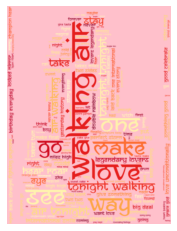

Smile


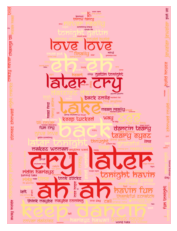

Teenage Dream


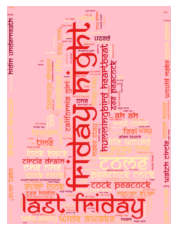

Witness


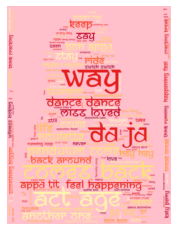

In [27]:
for i in range (len(df4)):
    print(df4["Album"].loc[i])
    wordcloud_gen(df4['Lyrics'].loc[i],i)

## Vocabulary

In [21]:
def unique_words(text):
    a = text.split()
    return len(set(a))

unique_list = []
no_of_words = []
for i in range(0,4):
    length = unique_words(df4["Lyrics"].loc[i])
    unique_list.append(length)
    words = len(df2["Lyrics"].loc[i].split())
    no_of_words.append(words)
unique_list

[729, 523, 907, 841]

In [22]:
no_of_words

[5557, 4475, 7948, 5834]

In [23]:
re_year = [2013, 2020, 2010, 2017]
df8 = pd.DataFrame(list(zip(albums, unique_list, no_of_words, re_year)),
                   columns=['Album', 'Unique Words','Total Words', 'Release'])
df8 = df8.sort_values(by='Release')
df8

,Album,Unique Words,Total Words,Release
2,Teenage Dream,907,7948,2010
0,Prism,729,5557,2013
3,Witness,841,5834,2017
1,Smile,523,4475,2020
